<table style="text-align: left; width: 100%;" border="0"
 cellpadding="0" cellspacing="0">
  <tbody>
    <tr align="center">
      <td><img style="float: right;" src="img/logo_properati_new.png"></td>
      <td></td>
      <td><img style="float: left;" src="img/dh-logo.png"></td>
    </tr>
    <tr align="center">
      <td colspan="3" rowspan="1"
 style="height: 1px; background-color: rgb(102, 0, 0);">.</td>
    </tr>
    <tr align="center">
      <td colspan="3" rowspan="1"><big><big><big><span
 style="font-family: Calibri;"><span
 style="font-weight: bold;"></span>Análisis
exploratorio de precios de propiedades</span></big></big></big><br>
      </td></tr>
    <tr align="center">       
      <td colspan="3" rowspan="1"><img style="float: center"; src="img/properati-search.png"> </td>
    </tr>
  </tbody>
</table>

<span style="font-family: Calibri; font-weight: bold; color: black;">Autores:</span><br
 style="font-family: Calibri;">
<span style="font-family: Calibri; font-style: italic;">Laura
Bassetti &lt;laurabassetti@gmail.com</span><span
 style="font-style: italic;">&gt;</span><br
 style="font-family: Calibri; font-style: italic;">
<span style="font-family: Calibri; font-style: italic;">Cristian
Leandro Campagna &lt;campagna.cristian@gmail.com&gt;</span><br
 style="font-family: Calibri; font-style: italic;">
<span style="font-family: Calibri; font-style: italic;">Alex
Bulgheroni &lt;alexbulgheroni@yahoo.com.ar&gt;</span><br
 style="font-family: Calibri; font-style: italic;">
<span style="font-family: Calibri; font-style: italic;">Aureliano
Chavarría&nbsp;&lt;aurelianochavarria@gmail.com&gt;</span>

<div class="footer">&copy; 2018 G5</div>

# Indice

- [Introducción](#Introducción)
- [Análisis Preliminar](#Análisis_Preliminar)
- [Análisis y Limpieza de Variables](#Análisis_y_Limpieza_de_Variables)
    - [Id / Operation](#Id_Operation)
    - [Property_type](#Property_type)
    - [Análisis de Lugares ](#Anális_de_Lugares)
    - [Análisis de Precios ](#Análisis_de_Precios)
    - [Análisis de Superficie ](#Análisis_de_superficie)
- [Análisis Descriptivo ](#Análisis_Descriptivo)
    
    

----- borrar al final ---------------

[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>




# Introducción
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

**Properati** es un **portal inmobiliario** nacido en Argentina en 2012, que actualmente opera en Brasil, Chile y México con más de 3 millones de visitas por mes, 2.1 millones de propiedades publicadas, un equipo de más de 20 personas y USD 5 millones en inversión.

# Análisis_Preliminar
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

Exploración básica para identificar variables, tipos de datos, cantidad de registros, etc.


In [51]:
import pandas as pd
import numpy as np

df = pd.read_csv('properati.csv', encoding = 'utf-8-sig')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [53]:
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [54]:
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [55]:
df.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


[Another Cell](#another_cell)

# Análisis_y_Limpieza_de_Variables
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

En esta sección exploramos las variables que componen el DataSet, analizamos, completamos y limpiamos los datos.

## Id_Operation
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

Analizamos las primeras 2 variables del dataset: columnas **ID**  y **Operation**

Suponemos que la variable  **ID** es el índice autoincremental de todo el DataSet. Para comprobarlo generamos la variable **total** a la que le asignamos la suma del autoincremento de valores iterando por la cantidad de registros que tiene el DataSet.

In [56]:
df['Unnamed: 0'].nunique() # cuenta "distinct values", al ser el resultado 121220, concluimos que 
                           # hay un valor único de id por cada registro

121220

In [57]:
total = 0
for i in range(121220):
    total += i
    i += 1
total

7347083590

In [58]:
df['Unnamed: 0'].sum()

7347083590

In [59]:
df['Unnamed: 0'].sum() == total # al ser True, la sum de los valores coincide con el valor generado con el "for loop"
                                # y por lo tanto son 121220 valores únicos en secuencia de uno en uno

True

In [60]:
# La columna 'Unnamed: 0' es igual al índice del DataFrame, procedemos a descartarla
df.drop(['Unnamed: 0'], axis=1, inplace=True)

La columna **operation** indica todas operaciones de venta 'sell' por lo que no nos aporta valor para el anális y procedemos a borrarla. 

In [61]:
df.loc[:,'operation'].value_counts()

sell    121220
Name: operation, dtype: int64

In [62]:
# descartamos la columna 'operation'
df.drop(['operation'], axis=1, inplace=True)

## Property_type

La variable **Property_type** no representa dificultades. Todos los campos estan completos.
Verificamos que no existen nulos y pasamos las cadenas a minúsculas


In [63]:
df['property_type'] = df['property_type'].map(str.lower)

In [64]:
df["property_type"].value_counts()

apartment    71065
house        40268
ph            5751
store         4136
Name: property_type, dtype: int64

In [65]:
df["property_type"].value_counts().sum()

121220

In [66]:
df["property_type"].isnull().sum()


0

## Anális_de_Lugares
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

En esta sección agrupamos a las siguientes variables relacionadas con la LOCALIZACION de una propiedad:

- **place_name**
- **place_with_parent_names**
- **country_name**
- **state_name**


In [67]:
df['q1'] = 1 # creo variable para hacer cuentas

In [68]:
df["q1"].value_counts()

1    121220
Name: q1, dtype: int64

In [69]:
df["q1"].isnull().sum()

0

### Place_name 

Pasamos a minúsculas y analizamos valores unicos y valores Nulos

In [70]:
df['place_name'] = df['place_name'].str.lower()

In [71]:
df.head(1)

,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,q1
0,ph,mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1


In [72]:
df['place_name'].unique()

array(['mataderos', 'la plata', 'liniers', ..., 'laguna paiva',
       'malabrigo', 'altos de hudson i'], dtype=object)

In [73]:
df['place_name'].isnull().sum()

23

#### Place_name conclusión 1: 
Se hallaron 23 valores Nulos. Se procede a realizar en anlisis de los datos para hallar patrones de relleno de los mismos.

In [74]:
df[df['place_name'].isnull()]#.head(2)

,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,q1
6489,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,-58.638098,650000.0,...,2708.333333,2708.333333,NaN,NaN,NaN,http://www.properati.com.ar/15ui7_venta_casa_t...,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/7/vQjgbHSz1fKXxy...,1
10201,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,-58.638067,535000.0,...,NaN,1783.333333,NaN,5.0,NaN,http://www.properati.com.ar/166p5_venta_casa_t...,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...,https://thumbs4.properati.com/1/FABpKIJMaoAO3t...,1
11451,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,-58.626261,550000.0,...,253.456221,2037.037037,NaN,NaN,NaN,http://www.properati.com.ar/16bpd_venta_casa_t...,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE,https://thumbs4.properati.com/5/fwH9L71hW2rW7V...,1
14839,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,-58.638174,480000.0,...,2000.000000,2400.000000,NaN,NaN,NaN,http://www.properati.com.ar/16tal_venta_casa_b...,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/1/3ZbPSffTY38y7v...,1
18622,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,-58.626350,1297000.0,...,3814.705882,3814.705882,NaN,NaN,NaN,http://www.properati.com.ar/177ee_venta_casa_t...,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...,https://thumbs4.properati.com/0/52JCH1PKYCOMe6...,1
21922,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,-58.638405,440000.0,...,NaN,2000.000000,NaN,5.0,NaN,http://www.properati.com.ar/17gy5_venta_casa_s...,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre,https://thumbs4.properati.com/8/oO7kmFPYNm8DYr...,1
23664,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,-58.641800,480000.0,...,1632.653061,1632.653061,NaN,NaN,NaN,http://www.properati.com.ar/17mb5_venta_casa_t...,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA,https://thumbs4.properati.com/2/LQCwH6txpFqetn...,1
24722,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,-58.637778,530000.0,...,1677.215190,1962.962963,NaN,NaN,NaN,http://www.properati.com.ar/17oz1_venta_casa_t...,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/0/Nhx4NejZaQACap...,1
38856,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,-58.579659,1350000.0,...,NaN,2454.545455,NaN,NaN,NaN,http://www.properati.com.ar/18mcb_venta_casa_t...,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta",https://thumbs4.properati.com/2/Izq8d5o8ti3kJy...,1
45970,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,-58.637380,95000.0,...,1727.272727,3518.518519,NaN,1.0,NaN,http://www.properati.com.ar/1958f_venta_depart...,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. T

Luego de analizar place_name comprobamos que el 100% de los casos se corresponden a una misma zona, en la variable place_with_parent_names se encuentra el valor de relleno:  

- **|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||**

In [75]:
df.loc[df['place_with_parent_names'] == '|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||', 'place_name'] = 'tigre'

Se comprueba que el Nulo haya sido reemplazado correctamente

In [76]:
df[df['place_name'].isnull()]

,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,q1


### Country_Name
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

Para la variable **Country_Name** identificamos que el 100% son propiedades de ARGENTINA.

In [77]:
df['country_name'] = df['country_name'].str.lower()

In [78]:
df['country_name'].unique()

array(['argentina'], dtype=object)

In [79]:
df['state_name'].isnull().sum()

0

### State_Name
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

In [80]:
df['state_name'] = df['state_name'].str.lower()

In [81]:
df['state_name'].unique()

array(['capital federal', 'bs.as. g.b.a. zona sur',
       'buenos aires costa atlántica', 'entre ríos',
       'bs.as. g.b.a. zona norte', 'santa fe', 'córdoba',
       'bs.as. g.b.a. zona oeste', 'misiones', 'buenos aires interior',
       'salta', 'neuquén', 'río negro', 'san luis', 'mendoza',
       'corrientes', 'chubut', 'tucumán', 'la pampa', 'chaco', 'san juan',
       'santa cruz', 'tierra del fuego', 'catamarca',
       'santiago del estero', 'jujuy', 'la rioja', 'formosa'],
      dtype=object)

In [82]:
df['state_name'].isnull().sum()

0

### Place_with_parent_names
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

**Place_with_parent_names** es una variable construida con el concatenado de otras variables, se procede a llevar a todo a minuscula y separar el string en nuevas variables:

- pais2
- state_name2
- place_name2
- place_name2a
- place_name2b
- place_name2c


In [83]:
df['place_with_parent_names'] = df['place_with_parent_names'].str.lower()

In [84]:
df['place_with_parent_names'].unique()

array(['|argentina|capital federal|mataderos|',
       '|argentina|bs.as. g.b.a. zona sur|la plata|',
       '|argentina|capital federal|liniers|', ...,
       '|argentina|santa fe|laguna paiva|',
       '|argentina|santa fe|malabrigo|',
       '|argentina|bs.as. g.b.a. zona sur|berazategui|altos de hudson i|'],
      dtype=object)

In [85]:
df['place_with_parent_names'].isnull().sum()
str.split

<method 'split' of 'str' objects>

In [86]:
df2 = df['place_with_parent_names'].str.split('|', expand=True).rename(columns={0: 'id', 1:'pais2', 2:'state_name2' , 3:'place_name2' ,  4:'place_name2a' , 5:'place_name2b' , 6:'place_name2c'})

In [87]:
df2.sample(3)

,id,pais2,state_name2,place_name2,place_name2a,place_name2b,place_name2c
9165,,argentina,capital federal,nuñez,,None,None
8820,,argentina,buenos aires interior,rivadavia,roosevelt,,None
91587,,argentina,capital federal,palermo,,None,None


In [88]:
df2['place_name2c'].unique()

array([None, ''], dtype=object)

Se elimina variable place_name2c solo presenta valores None o ''

In [89]:
df2.drop('place_name2c', axis=1, inplace=True)

df2.head(2)

,id,pais2,state_name2,place_name2,place_name2a,place_name2b
0,,argentina,capital federal,mataderos,,None
1,,argentina,bs.as. g.b.a. zona sur,la plata,,None


In [90]:
# Merge por índices sin repetir columnas que figuran en ambos DataFrames (ver pandas.index.difference)
df = pd.merge(df, df2[df2.columns.difference(df.columns)], left_index = True, right_index = True)

In [91]:
df.sample(5)

,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,...,description,title,image_thumbnail,q1,id,pais2,place_name2,place_name2a,place_name2b,state_name2
73717,apartment,palermo,|argentina|capital federal|palermo|,argentina,capital federal,3430234.0,"-34.5701787108,-58.432229072",-34.570179,-58.432229,156750.0,...,Espectacular 2 ambientes de 50m2 en Las Cañita...,2 Ambientes de 50m2 en Las Cañitas!! Meet in A...,https://thumbs4.properati.com/6/5Hv3qkOupfxJgP...,1,,argentina,palermo,,None,capital federal
17065,house,pinamar,|argentina|buenos aires costa atlántica|pinamar|,argentina,buenos aires costa atlántica,3429971.0,"-37.0893132752,-56.8539229609",-37.089313,-56.853923,350000.0,...,Casa de 4 dormitorios a estrenar. Con Pileta e...,CASA A ESTRENAR ALAMOS II,https://thumbs4.properati.com/9/OEBGdffVk2c7vY...,1,,argentina,pinamar,,None,buenos aires costa atlántica
87933,apartment,puerto madero,|argentina|capital federal|puerto madero|,argentina,capital federal,3429760.0,NaN,NaN,NaN,761250.0,...,Unidad de características únicas. Se tratará d...,"Departamento de 2,5 ambientes con dormitorio e...",https://thumbs4.properati.com/4/OopoP2yhPSRcHP...,1,,argentina,puerto madero,,None,capital federal
123,house,luján,|argentina|buenos aires interior|luján|,argentina,buenos aires interior,3430982.0,"-34.5850814167,-59.1181568709",-34.585081,-59.118157,150000.0,...,CODIGO: 2016-CV299 ubicado en: La Viudita 2238...,Casa en venta con ampliación a terminar. B° Va...,https://thumbs4.properati.com/2/UN6N2_qTQsZQS1...,1,,argentina,luján,,None,buenos aires interior
64222,house,tigre,|argentina|bs.as. g.b.a. zona norte|tigre|,argentina,bs.as. g.b.a. zona norte,3427753.0,NaN,NaN,NaN,398000.0,...,Casa en San Isidro Labrador en lote interno!Pl...,Casa en San Isidro Labrador en lote interno,https://thumbs4.properati.com/5/Th2zqIuwYWG65K...,1,,argentina,tigre,,None,bs.as. g.b.a. zona norte


<br><br>
Se analiza que las variables nuevas de estado coincidan con las originales

In [92]:
dfstate = df.loc[(df['state_name'] != df['state_name2'])]
dfstate

,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,...,description,title,image_thumbnail,q1,id,pais2,place_name2,place_name2a,place_name2b,state_name2


STATE NAME = no se hallan diferencias entre columnas. se procede a eliminar 'state_name2'

In [93]:
df.drop('state_name2', axis=1, inplace=True)

#### Analizamos place_name vs la nueva place name:

##### Analisis de igualdad

In [94]:
dfplace = df.loc[(df['place_name'] == df['place_name2'])]
dfplace.sample(5)

,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,...,properati_url,description,title,image_thumbnail,q1,id,pais2,place_name2,place_name2a,place_name2b
43853,apartment,tigre,|argentina|bs.as. g.b.a. zona norte|tigre|,argentina,bs.as. g.b.a. zona norte,3427753.0,NaN,NaN,NaN,128000.0,...,http://www.properati.com.ar/18z8o_venta_depart...,DescripciÃ³n: Departamento en impecable estado...,Departamento 60m² con Plantas en Montevideo 15...,https://thumbs4.properati.com/6/KAS1RARDWdxkec...,1,,argentina,tigre,,None
9742,house,córdoba,|argentina|córdoba|córdoba|,argentina,córdoba,3860259.0,"-31.3518605,-64.2658417",-31.351861,-64.265842,2250000.0,...,http://www.properati.com.ar/165gz_venta_casa_c...,Casa en Venta de 2 dorm. en Cordoba,Complejo Del Dante ubicado sobre calle H,https://thumbs4.properati.com/3/xD4rvSADrvYfHR...,1,,argentina,córdoba,,None
93853,house,escobar,|argentina|bs.as. g.b.a. zona norte|escobar|,argentina,bs.as. g.b.a. zona norte,3434130.0,NaN,NaN,NaN,190000.0,...,http://www.properati.com.ar/1berd_venta_casa_e...,"ESCOBAR, EL CANTON NORTE - EXCELENTE OPORTUNID...",Venta casa 4 ambientes - El Canton Puerto,https://thumbs4.properati.com/0/ke4PFlUQsMhDMG...,1,,argentina,escobar,,None
45249,apartment,mar del plata,|argentina|buenos aires costa atlántica|mar de...,argentina,buenos aires costa atlántica,3430863.0,"-37.9997454,-57.5430262",-37.999745,-57.543026,149000.0,...,http://www.properati.com.ar/193my_venta_depart...,Venta apto crédito bancario. Departamento de 3...,Departamento 3 ambientes apto crédito bancario,https://thumbs4.properati.com/2/8xOvPTwcoUnC_J...,1,,argentina,mar del plata,,None
53753,apartment,vicente lópez,|argentina|bs.as. g.b.a. zona norte|vicente ló...,argentina,bs.as. g.b.a. zona norte,3427504.0,"-34.5234626,-58.4756836",-34.523463,-58.475684,136000.0,...,http://www.properati.com.ar/19lyg_venta_depart...,"Muy lindo 2 ambientes próximo a Av.libertador,...",MUY LINDO 2 AMBIENTES PRÓXIMO A AV.LIBERTADOR ...,https://thumbs4.properati.com/1/y7L8KEBfl7Rcga...,1,,argentina,vicente lópez,,None


In [95]:
dfplace['q1'].sum() 

86050

86050 valores son coincidentes.

##### Analisis de desigualdad

In [96]:
dfplace2 = df.loc[(df['place_name'] != df['place_name2'])]
dfplace2.sample(5)
dfplace2.loc[:, ['place_name', 'place_name2', 'place_name2a', 'place_name2b']]

,place_name,place_name2,place_name2a,place_name2b
4,centro,mar del plata,centro,
6,munro,vicente lópez,munro,
12,martínez,san isidro,martínez,
13,palermo soho,palermo,palermo soho,
14,palermo soho,palermo,palermo soho,
15,bella vista,san miguel,bella vista,
17,barrio el golf,tigre,nordelta,barrio el golf
24,castelar,morón,castelar,
25,castelar,morón,castelar,
26,barrio san gabriel,tigre,barrio san gabriel,


In [97]:
dfplace2['q1'].sum() 

35170

35170 valores son no coincidentes.

Analizamos las variables independientemente una de otra: 

In [98]:
df['place_name2'].isnull().sum()

0

In [99]:
df['place_name2'].unique()

array(['mataderos', 'la plata', 'liniers', 'mar del plata',
       'gualeguaychú', 'vicente lópez', 'belgrano', 'rosario', 'córdoba',
       'san miguel', 'san isidro', 'palermo', 'tigre', 'villa giardino',
       'general rodríguez', 'pilar', 'morón', 'flores', 'boedo',
       'malagueño', 'las cañitas', 'villa carlos paz', 'puerto madero',
       'balvanera', 'escobar', 'caballito', 'nuñez', 'berazategui',
       'general san martín', 'ituzaingó', 'posadas', 'tres de febrero',
       'san bernardo', 'san telmo', 'almagro', '', 'san fernando',
       'pinamar', 'colón', 'luján', 'san lorenzo', 'la matanza', 'lanús',
       'punilla', 'villa gesell', 'lomas de zamora', 'salta', 'santa fe',
       'colegiales', 'exaltación de la cruz', 'floresta', 'quilmes',
       'reconquista', 'confluencia', 'general roca', 'barrio norte',
       'emilia', 'barracas', 'villa allende', 'lobos',
       'san martín de los andes', 'recoleta', 'congreso', 'villa crespo',
       'chacarita', 'constitución'

In [100]:
df['place_name2a'].isnull().sum()

4780

In [101]:
df['place_name2a'].unique()

array(['', 'centro', 'munro', 'martínez', 'palermo soho', 'bella vista',
       'nordelta', 'pilar', 'castelar', 'barrio san gabriel',
       'estancias del pilar', 'del viso', 'san isidro', 'acassuso',
       'fincas de iraola', 'san martín', 'caseros', None,
       'boulogne sur mer', 'victoria', 'benavidez', 'beccar',
       'lomas del mirador', 'lanús este', 'banfield', 'jose leon suarez',
       'olivos', 'el talar', 'quilmes', 'la plata', 'belén de escobar',
       'villa maipu', 'san andres', 'villa bosch', 'sáenz peña',
       'empalme lobos', 'ramos mejía', 'san miguel',
       'country maschwitz privado', 'las golondrinas',
       'palermo hollywood', 'pontevedra',
       'barrio cerrado fincas de maschwitz', 'haedo', 'virreyes',
       'san carlos de bariloche', 'villa ballester', 'lisandro olmos',
       'vicente lópez', 'la perla', 'tigre', 'san justo', 'palermo chico',
       'bernal', 'la lonja', 'jose marmol', 'martín coronado', 'tolosa',
       'mapuche country club', 

En variable "place_name2a" se hallan nulos = '' se procede a transpormarlos en NAN

In [102]:
df['place_name2a'].replace('', np.nan, inplace=True)

In [103]:
df['place_name2a'].isnull().sum()

80803

In [104]:
df['place_name2b'].isnull().sum()

80780

In [105]:
df['place_name2b'].unique()

array([None, '', 'barrio el golf', 'barrio las glorietas',
       'barrio los lagos', 'enyoi', 'qbay yacht', 'barrio la alameda',
       'islas del canal', 'barrio los alisos', 'barrioportezuelo',
       'barrio la isla', 'barrio los tilos', 'barrio los sauces',
       'barrio cabos del lago', 'barrio los castores',
       'barrio barrancas del lago', 'barrio el yacht'], dtype=object)

En variable "place_name2b" se hallan nulos = 'None' y ''  se procede a transpormarlos en NAN

In [106]:
df['place_name2b'].replace('', np.nan, inplace=True)

In [107]:
df['place_name2b'].unique()

array([None, nan, 'barrio el golf', 'barrio las glorietas',
       'barrio los lagos', 'enyoi', 'qbay yacht', 'barrio la alameda',
       'islas del canal', 'barrio los alisos', 'barrioportezuelo',
       'barrio la isla', 'barrio los tilos', 'barrio los sauces',
       'barrio cabos del lago', 'barrio los castores',
       'barrio barrancas del lago', 'barrio el yacht'], dtype=object)

In [108]:
#df['place_name2b'].replace(None, np.nan, inplace=True) # no funcionó

In [109]:
df['place_name2b'].fillna(value=np.nan, inplace=True) # este si funciono NON a NAN

In [110]:
df['place_name2b'].unique()

array([nan, 'barrio el golf', 'barrio las glorietas', 'barrio los lagos',
       'enyoi', 'qbay yacht', 'barrio la alameda', 'islas del canal',
       'barrio los alisos', 'barrioportezuelo', 'barrio la isla',
       'barrio los tilos', 'barrio los sauces', 'barrio cabos del lago',
       'barrio los castores', 'barrio barrancas del lago',
       'barrio el yacht'], dtype=object)

## Análisis_de_Precios

[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

Analizamos relaciones y redundancia entre las 4 variables relacionadas con el precio:

- price
- currency
- price_aprox_local_currency
- price_aprox_usd



Evaluamos cantidad de valores que no son nulos para cada una de ellas.

In [111]:
df.loc[:,['price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd']].count()

price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
dtype: int64

<br><br>

Hay un registro que le falta completar el 'currency'

In [112]:
# Hay un registro que le falta completar el 'currency'
df.loc[df.price.notnull() & df.currency.isnull(), ['price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd']]

,price,currency,price_aprox_local_currency,price_aprox_usd
9761,0.0,NaN,0.0,0.0


In [113]:
# el 'price' es también cero con lo que el registro es para descartar
df.loc[9761, :]

property_type                                                             house
place_name                                                              córdoba
place_with_parent_names                                     |argentina|córdoba|
country_name                                                          argentina
state_name                                                              córdoba
geonames_id                                                         3.86026e+06
lat-lon                                                  4.5458426,-75.67893099
lat                                                                     4.54584
lon                                                                    -75.6789
price                                                                         0
currency                                                                    NaN
price_aprox_local_currency                                                    0
price_aprox_usd                         

In [114]:
# en la 'description'y en el 'title' tampoco hay información adicional como para completar el precio
df.loc[9761, "description"]

'Casa en Venta de 2 dorm. en Armenia'

In [115]:
# hay un solo registro con precio 0 o negativo y es el mismo que identificamos arriba
df.loc[df.price_aprox_usd < 0.1 , 'price_aprox_usd']

9761    0.0
Name: price_aprox_usd, dtype: float64

In [116]:
# descartamos el registro 9761
df.drop(labels=9761, axis=0, inplace=True)
df.loc[9759:9763]

,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,...,properati_url,description,title,image_thumbnail,q1,id,pais2,place_name2,place_name2a,place_name2b
9759,house,córdoba,|argentina|córdoba|,argentina,córdoba,3860255.0,"-31.4200833,-64.188776",-31.420083,-64.188776,126000.0,...,http://www.properati.com.ar/165i1_venta_casa_c...,Casa en Venta de 3 dorm. en Abisinia,Titulo para publicacion en Portales,https://thumbs4.properati.com/7/KHbjrDo3nde5jn...,1,,argentina,,None,NaN
9760,house,córdoba,|argentina|córdoba|,argentina,córdoba,3860255.0,"-31.4200833,-64.188776",-31.420083,-64.188776,NaN,...,http://www.properati.com.ar/165i2_venta_casa_c...,Casa en Venta de 2 dorm. en Armenia,EN VENTA CASA EN LIMONARES,https://thumbs4.properati.com/1/Nhnu4rxxSkc2xb...,1,,argentina,,None,NaN
9762,house,córdoba,|argentina|córdoba|,argentina,córdoba,3860255.0,"-31.4200833,-64.188776",-31.420083,-64.188776,126000.0,...,http://www.properati.com.ar/165i4_venta_casa_c...,Casa en Venta de 3 dorm. en ABANCAY,Titulo para publicacion en Portales,https://thumbs4.properati.com/1/39ygOVm6gYgObX...,1,,argentina,,None,NaN
9763,house,córdoba,|argentina|córdoba|córdoba|,argentina,córdoba,3860259.0,"-31.4200833,-64.188776",-31.420083,-64.188776,126000.0,...,http://www.properati.com.ar/165i5_venta_casa_c...,Casa en Venta de 3 dorm. en Cordoba,Titulo para publicacion en Portales,https://thumbs4.properati.com/3/BvvVOvO4fBZWe2...,1,,argentina,córdoba,NaN,NaN


### Conclusión 1
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

Para cada variable encontramos al menos 100.809 registros que no son nulos, a continuación
verificamos si son los mismos 100.809 registros

In [117]:
# La comparación de esta celda nos da, por cada registro del dataset, un valor True si ambas columnas tienen
# un valor Null o si ambas tienen un valor que no es Null. Por lo tanto al sumar 121219 valores True 
# (equivalente a la totalidad el dataset), confimrmos los valores no nulos de ambas columnas provienen del mismo 
# subconjunto de registros

(df.loc[:,'price'].notnull() == df.loc[:,'currency'].notnull()).sum()

121219

In [118]:
# Los mismos registros tiene datos o valor null en todos los registros si comparamos 'price' y
# 'price_aprox_local_currency'

(df.loc[:,'price'].notnull() == df.loc[:,'price_aprox_local_currency'].notnull()).sum()

121219

In [119]:
# La misma situación se repite entre 'price' y 'price_aprox_usd'

(df.loc[:,'price'].notnull() == df.loc[:,'price_aprox_usd'].notnull()).sum()

121219

Por lo tanto concluimos que son los mismos 100.809 los que tienen valores que no son nulos en las 4 vaiables
relacionadas con el Precio

### Relación entre las 4 variables relacionadas con el precio.
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

A Continuación, evaluamos la relación entre las 4 variables relacionadas con el precio.

Nuestra hipótesis es que el usuario ingresa el precio y la moneda (variables **'price'** y **'currency'**) y luego el sistema estima
el precio en moneda local **(ARS)** y el precio en dólares **(USD)**. De confirmarse esta hipótesis podríamos descartar las columnas:
- price
- currency 
- price_aprox_local_currency

por redundantes y mantener para nuestro análisis solo la columna:
- price_aprox_usd

<br><br>
Todos los registros con 'currency' == 'USD' tienen el mismo tipo de cambio implícito (un único valor) de 'price_aprox_local_currency' contra 'price' 

In [120]:
round(df.loc[df.loc[:,'currency'] == 'USD', 'price_aprox_local_currency'] / \
 df.loc[df.loc[:,'currency'] == 'USD', 'price'],4).value_counts()

17.6445    87587
dtype: int64

In [121]:
# Todos los registros con 'currency' == 'USD' tienen el mismo tipo de cambio implícito (un único valor)
# de 'price_aprox_usd' contra 'price' 

round(df.loc[df.loc[:,'currency'] == 'USD', 'price_aprox_usd'] / \
 df.loc[df.loc[:,'currency'] == 'USD', 'price'],4).value_counts()

1.0    87587
dtype: int64

In [122]:
# Todos los registros con 'currency' == 'ARS' tienen un de cambio implícito de uno (también un único valor)
# de 'price_aprox_local_currency' contra 'price'. 

round(df.loc[df.loc[:,'currency'] == 'ARS', 'price_aprox_local_currency'] / \
 df.loc[df.loc[:,'currency'] == 'ARS', 'price'],1).value_counts()

1.0    13219
dtype: int64

In [123]:
# Todos los registros con 'currency' == 'ARS' tienen un tipo de cambio implícito entre 17.983 y 17.43
# de 'price' contra 'price_aprox_usd'. Estos valores son consistentes con un único tipo de cambio

round(df.loc[df.loc[:,'currency'] == 'ARS', 'price'] / \
 df.loc[df.loc[:,'currency'] == 'ARS', 'price_aprox_usd'],2).value_counts()

17.83    12857
17.14      290
17.63       54
17.80        6
17.20        4
17.50        3
17.40        2
17.47        1
17.41        1
17.43        1
dtype: int64

### Conclusión 2
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

Las relaciones de tipo de cambio implícito entre las variables confirman nuestra hipótesis descripta arriba y prodedemos a descartar las columnas reduntates.

Dejamos **price_aprox_usd**

In [124]:
df.drop(['price', 'price_aprox_local_currency', 'currency'], axis=1, inplace=True)

In [125]:
df.columns

Index(['property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'description', 'title', 'image_thumbnail', 'q1', 'id',
       'pais2', 'place_name2', 'place_name2a', 'place_name2b'],
      dtype='object')

<br><br>
## Análisis_de_superficie
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>


Analizamos las relaciones entre las variables relacionadas con la superfície. Creamos una variable nueva **surf_cov_to_tot** que es la relación de m2 cubiertos contra m2 totales.

In [126]:
df.loc[:,'surf_cov_to_tot'] = df.loc[:,'surface_covered_in_m2'] / df.loc[:,'surface_total_in_m2']

In [127]:
bins = [0., 0.5, 0.8, 1., 1000.]
pd.cut(df.loc[:, 'surf_cov_to_tot'], bins, include_lowest = True).value_counts(sort = False) 

(-0.001, 0.5]     8543
(0.5, 0.8]       12635
(0.8, 1.0]       52070
(1.0, 1000.0]     1106
Name: surf_cov_to_tot, dtype: int64

<br><br>
### Conclusión 1
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

Hay 1106 registros con valores de superfície cubierta superior a la superfície total, lo cual no resulta muy  razonable por la definición de ambas variables

In [128]:
df.loc[:,'surf_cov_to_tot'].describe()

count    74354.000000
mean         0.893177
std          6.327980
min          0.000000
25%          0.771849
50%          0.903614
75%          1.000000
max       1000.000000
Name: surf_cov_to_tot, dtype: float64

<br><br>
### Conclusión 2
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

La desviación estándard de 6.32 es grande en relación a la media de 0.89. Además el valor mínimo de 0 y el máximo de 1.000 llaman la atención como posibles "outliers".

In [129]:
df.groupby('property_type')['surf_cov_to_tot'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
apartment,46056.0,0.923246,4.507600,0.000000,0.843750,0.915254,1.0,942.307692
house,22697.0,0.740981,1.143395,0.000100,0.406114,0.800000,1.0,82.857143
ph,3360.0,0.875110,2.098620,0.003333,0.705882,0.844444,1.0,101.534483
store,2241.0,1.843752,29.839719,0.002041,1.000000,1.000000,1.0,1000.000000


<br><br>
Evaluamos, ahora los registros con relación de **Superfície Cubierta** a **Superfície Total** mayor a 1.
Primero definimos una máscara booleana con los registros que cumplen la condición.

In [130]:
masc_gr_one = df.loc[:,'surf_cov_to_tot'] > 1.0
masc_gr_one.sum()

1106

In [131]:
df.loc[masc_gr_one, ['property_type', 'price_aprox_usd', 'surface_covered_in_m2', \
                   'surface_total_in_m2', 'surf_cov_to_tot']].sort_values('surf_cov_to_tot').sample(20)

,property_type,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2,surf_cov_to_tot
41943,house,170000.00,300.0,200.0,1.500000
21278,ph,120000.00,75.0,48.0,1.562500
34940,house,240000.00,138.0,100.0,1.380000
455,house,119000.00,430.0,170.0,2.529412
14296,apartment,201387.17,1900.0,314.0,6.050955
28234,apartment,85000.00,53.0,47.0,1.127660
14316,house,110000.00,800.0,110.0,7.272727
30758,house,460000.00,335.0,200.0,1.675000
59769,house,128000.00,78.0,60.0,1.300000
45450,house,540000.00,360.0,300.0,1.200000



### Conclusión 3
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

Parecen estar cargados al revés, por lo tanto podríamos intercambiar los datos de los registros con ratio mayor a uno.

In [132]:
df.loc[masc_gr_one, ['property_type', 'price_aprox_usd', 'surface_covered_in_m2', \
                   'surface_total_in_m2', 'surf_cov_to_tot']].sort_values('surf_cov_to_tot').tail(20)

,property_type,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2,surf_cov_to_tot
44241,house,700000.00,23871.0,1080.0,22.102778
12745,house,60000.00,3000.0,120.0,25.000000
34307,house,380000.00,270.0,10.0,27.000000
38792,house,140000.00,3100.0,100.0,31.000000
39221,house,620000.00,38240.0,1200.0,31.866667
82408,apartment,67300.41,5335.0,128.0,41.679688
37676,house,159838.47,2400.0,50.0,48.000000
28485,apartment,190000.00,3673.0,75.0,48.973333
10824,house,100950.61,11111.0,220.0,50.504545
46086,ph,100000.00,6610.0,100.0,66.100000


### Conclusión 4
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

Viendo la parte inferior del listado vemos algunos registros con valores que podrían consistir en errores de carga, especialmente en las **property_type**, **store** y **apartment**. 

Más adelante, en este "Notebook" evaluaremos los outliers de **Precio Unitario (USD/M2)**, seguramente en ese proceso podremos identificar alguna acción a seguir con estos valores.

Procedemos a reemplazar los valores de superfície cubierta y superfície total. Generamos una columna provisoria **temp** con los valores de Superfície Total

In [133]:
df['temp'] = df.loc[masc_gr_one, 'surface_total_in_m2']
df.loc[masc_gr_one, ['surface_covered_in_m2', 'surface_total_in_m2', 'temp', 'surf_cov_to_tot']].head(10)

,surface_covered_in_m2,surface_total_in_m2,temp,surf_cov_to_tot
78,18615.0,261.0,261.0,71.321839
177,450.0,420.0,420.0,1.071429
316,156.0,125.0,125.0,1.248000
317,156.0,125.0,125.0,1.248000
455,430.0,170.0,170.0,2.529412
668,230.0,180.0,180.0,1.277778
918,65.0,60.0,60.0,1.083333
1397,89.0,80.0,80.0,1.112500
1598,105.0,90.0,90.0,1.166667
1690,230.0,100.0,100.0,2.300000


<br>
Asignamos los valores de Superfície Cubierta a la columna Superfíce Total

In [134]:
df.loc[masc_gr_one, 'surface_total_in_m2'] = df.loc[masc_gr_one, 'surface_covered_in_m2']
df.loc[masc_gr_one, ['surface_covered_in_m2', 'surface_total_in_m2', 'temp', 'surf_cov_to_surf_tot']].head(10)

C:\Pgms\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,surface_covered_in_m2,surface_total_in_m2,temp,surf_cov_to_surf_tot
78,18615.0,18615.0,261.0,NaN
177,450.0,450.0,420.0,NaN
316,156.0,156.0,125.0,NaN
317,156.0,156.0,125.0,NaN
455,430.0,430.0,170.0,NaN
668,230.0,230.0,180.0,NaN
918,65.0,65.0,60.0,NaN
1397,89.0,89.0,80.0,NaN
1598,105.0,105.0,90.0,NaN
1690,230.0,230.0,100.0,NaN


<br>
Muestreamos par ver que no estemos reemplazando valores por fuera de la máscara seleccionada

In [135]:
df.loc[masc_gr_one, ['surface_covered_in_m2', 'surface_total_in_m2', 'temp', 'surf_cov_to_surf_tot']].sample(10)

C:\Pgms\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,surface_covered_in_m2,surface_total_in_m2,temp,surf_cov_to_surf_tot
112802,34.0,34.0,33.0,NaN
28234,53.0,53.0,47.0,NaN
95456,50.0,50.0,46.0,NaN
69260,110.0,110.0,75.0,NaN
29290,70.0,70.0,40.0,NaN
53922,63.0,63.0,53.0,NaN
57384,525.0,525.0,90.0,NaN
53929,50.0,50.0,47.0,NaN
46473,90.0,90.0,10.0,NaN
28697,175.0,175.0,150.0,NaN


<br>
Asignamos los valores de Temp a la columna Superfície Cubierta

In [136]:
df.loc[masc_gr_one, 'surface_covered_in_m2'] = df.loc[masc_gr_one, 'temp']
df.loc[masc_gr_one, ['surface_covered_in_m2', 'surface_total_in_m2', 'temp', 'surf_cov_to_surf_tot']].head(10)

C:\Pgms\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,surface_covered_in_m2,surface_total_in_m2,temp,surf_cov_to_surf_tot
78,261.0,18615.0,261.0,NaN
177,420.0,450.0,420.0,NaN
316,125.0,156.0,125.0,NaN
317,125.0,156.0,125.0,NaN
455,170.0,430.0,170.0,NaN
668,180.0,230.0,180.0,NaN
918,60.0,65.0,60.0,NaN
1397,80.0,89.0,80.0,NaN
1598,90.0,105.0,90.0,NaN
1690,100.0,230.0,100.0,NaN


In [137]:
df.columns

Index(['property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'description', 'title', 'image_thumbnail', 'q1', 'id',
       'pais2', 'place_name2', 'place_name2a', 'place_name2b',
       'surf_cov_to_tot', 'temp'],
      dtype='object')

Eliminamos la columna **temp**

In [138]:
df.drop('temp', axis = 1, inplace = True)
df.columns

Index(['property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'description', 'title', 'image_thumbnail', 'q1', 'id',
       'pais2', 'place_name2', 'place_name2a', 'place_name2b',
       'surf_cov_to_tot'],
      dtype='object')

<br>
Finalmente agregamos una columna mediante la cual podamos trazar los valores que hemos cambiado

In [139]:
df.loc[masc_gr_one, 'reg_editado'] = 'surf_cov_tot_swapped'
df.loc[masc_gr_one, 'reg_editado'].head()

78     surf_cov_tot_swapped
177    surf_cov_tot_swapped
316    surf_cov_tot_swapped
317    surf_cov_tot_swapped
455    surf_cov_tot_swapped
Name: reg_editado, dtype: object

In [140]:
df.loc[~masc_gr_one, 'reg_editado'].head (10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: reg_editado, dtype: object

<br>
Recalculamos la relación entre superfície cubierta y superfície total luego de los cambios

In [141]:
df.loc[:,'surf_cov_to_tot'] = df.loc[:,'surface_covered_in_m2'] / df.loc[:,'surface_total_in_m2']

In [142]:
df.loc[:,'surf_cov_to_tot'].describe()

count    74354.000000
mean         0.822162
std          0.226041
min          0.000000
25%          0.763889
50%          0.900000
75%          1.000000
max          1.000000
Name: surf_cov_to_tot, dtype: float64

In [143]:
df.groupby('property_type')['surf_cov_to_tot'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
apartment,46056.0,0.885728,0.136244,0.000000,0.842105,0.914286,1.0,1.0
house,22697.0,0.684624,0.305446,0.000100,0.400000,0.779279,1.0,1.0
ph,3360.0,0.806815,0.187466,0.003333,0.700000,0.837838,1.0,1.0
store,2241.0,0.931767,0.170960,0.001000,1.000000,1.000000,1.0,1.0


In [144]:
# Ahora las desviaciones estándard tienen más sentido con respecto a lo media, además el valor máximo es 1.0 lo cual
# tiene más sentido

### Ahora analizamos los valores bajos del ratio 
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

Creamos una máscara con los registros que tienen baja relación Superfície Cubierta a Superfície Total

In [145]:

masc_low_surf_rat = df.loc[:, 'surf_cov_to_tot'] < 0.5 
masc_low_surf_rat.sum()

8454

In [146]:
df.loc[masc_low_surf_rat, ['property_type', 'price_aprox_usd', 'surface_covered_in_m2', \
                   'surface_total_in_m2', 'surf_cov_to_tot']].sample(20)

,property_type,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2,surf_cov_to_tot
95996,house,178000.0,170.0,555.0,0.306306
11124,house,290000.0,160.0,1013.0,0.157947
7293,house,550000.0,300.0,1092.0,0.274725
14518,house,1250000.0,366.0,1416.0,0.258475
1875,apartment,NaN,73.0,181.0,0.403315
20579,house,360000.0,190.0,585.0,0.324786
84625,house,240000.0,200.0,800.0,0.250000
6290,house,360000.0,247.0,697.0,0.354376
32737,house,89000.0,106.0,237.0,0.447257
46463,house,415000.0,198.0,556.0,0.356115


### Conclusión 5
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

En general Los valores de bajos ratios no parece fuera de lo esperable. Predominan las casas que pueden tener jardín o parque.

In [147]:
# Analiamos los registros que tienen bajos valores de superfície cubierta
masc_low_surf_cov = df.loc[:, 'surface_covered_in_m2'] < 10
masc_low_surf_cov = masc_low_surf_cov & df.loc[:, 'surf_cov_to_tot']
masc_low_surf_cov.sum()

133

In [148]:
df.loc[masc_low_surf_cov, ['property_type', 'price_aprox_usd', 'surface_covered_in_m2', \
                   'surface_total_in_m2', 'surf_cov_to_tot']].sample(20)

,property_type,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2,surf_cov_to_tot
94705,store,27000.0,1.0,19.0,0.052632
840,apartment,179500.0,4.0,40.0,0.100000
73709,apartment,65000.0,1.0,43.0,0.023256
47026,apartment,120000.0,7.0,55.0,0.127273
57519,apartment,92000.0,7.0,50.0,0.140000
3430,apartment,NaN,1.0,56.0,0.017857
3425,apartment,NaN,1.0,44.0,0.022727
94972,apartment,135000.0,1.0,113.0,0.008850
27467,apartment,80000.0,3.0,33.0,0.090909
94684,store,27000.0,1.0,19.0,0.052632


### Interrogante
Habría que determinar si hay un valor mínimo de corte de superfície cubierta. Pueden haber locales con superfícies chicas.

Ahora analizamos las superfícies totales mínimas

In [149]:
masc_low_surf_tot = df.loc[:, 'surface_total_in_m2'] < 10.05
masc_low_surf_tot = masc_low_surf_tot & df.loc[:, 'surf_cov_to_tot'].notnull()
masc_low_surf_tot.sum()

7

In [150]:
df.loc[masc_low_surf_tot, ['property_type', 'price_aprox_usd', 'surface_covered_in_m2', \
                   'surface_total_in_m2', 'surf_cov_to_tot']]

,property_type,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2,surf_cov_to_tot
14546,house,185000.00,10.0,10.0,1.0
14873,apartment,78000.00,10.0,10.0,1.0
14887,house,150000.00,10.0,10.0,1.0
16797,house,150000.00,10.0,10.0,1.0
47974,house,26359.32,10.0,10.0,1.0
48479,store,25000.00,10.0,10.0,1.0
50696,house,180000.00,10.0,10.0,1.0


In [151]:
bins2 = [0., 10., 20., 50.]
pd.cut(df.loc[df.loc[:, 'surf_cov_to_tot'].notnull(), 'surface_total_in_m2'], bins2, include_lowest = True).value_counts(sort = False)

(-0.001, 10.0]        7
(10.0, 20.0]        166
(20.0, 50.0]      18037
Name: surface_total_in_m2, dtype: int64

En ete caso, también estaremos pendientes de identificar **"outliers"** o valores a corregir cuando evaluemos
**Precios Unitarios**, más adelante en la 'Notebook'

### Análisis de no-nulo
Ahora analizamos aquellos registros que solo tienen valor **no-nulo** en la columnas de **Superfcie Cubierta** o sólo en la de **Superfície Total**.

Vemos los valores agregados por Tipo de Propiedad.

In [152]:
df.pivot_table('surf_cov_to_tot', index = ['property_type'], aggfunc = ['count', 'mean', np.median, 'min', 'max'])

,count,mean,median,min,max
,surf_cov_to_tot,surf_cov_to_tot,surf_cov_to_tot,surf_cov_to_tot,surf_cov_to_tot
property_type,,,,,
apartment,46056,0.885728,0.914286,0.000000,1.0
house,22697,0.684624,0.779279,0.000100,1.0
ph,3360,0.806815,0.837838,0.003333,1.0
store,2241,0.931767,1.000000,0.001000,1.0


<br>
También obtenemos la mediana de la relación de superfícies por geografía y por tipo de propiedad.

In [153]:
df.pivot_table('surf_cov_to_tot', index = ['state_name'], columns='property_type', 
               aggfunc = np.median)

property_type,apartment,house,ph,store
state_name,,,,
bs.as. g.b.a. zona norte,0.878788,0.836215,0.864251,1.000000
bs.as. g.b.a. zona oeste,0.933333,0.648000,0.807335,1.000000
bs.as. g.b.a. zona sur,0.947368,0.874563,0.900000,1.000000
buenos aires costa atlántica,1.000000,0.555556,0.898718,1.000000
buenos aires interior,1.000000,0.550000,1.000000,1.000000
capital federal,0.909091,0.741642,0.814120,1.000000
catamarca,NaN,0.773504,NaN,NaN
chaco,0.869565,0.921429,NaN,0.843077
chubut,0.991071,1.000000,1.000000,1.000000


In [154]:
# generamos un diccionario con los valores de la mediana por tipo de propiedad para poder utilizar esos 
# valores más adelante

dict_med_pt = df.pivot_table('surf_cov_to_tot', index = ['property_type'], aggfunc = np.median).to_dict()

In [155]:
# y otro dicionario con la mediana por tipo de propiedad y geografía

dict_rels = df.pivot_table('surf_cov_to_tot', index = ['state_name'], columns='property_type', 
               aggfunc = np.median).to_dict()

In [156]:
# Eliminamos los valores 'nan' del dccionario de relación de superfícies y lo reemplazamos por la mediana de ese
# Tipo de Propiedad

for protyp, dictval in dict_rels.items():
    for stnm, surfrel in dictval.items():
        if str(surfrel) == 'nan':
            dict_rels[protyp][stnm] = dict_med_pt['surf_cov_to_tot'][protyp]

In [157]:
# creamos una máscara para Superfície Cubierta que da True cuando los valores de la columna no son nulos 

masc_cov = df.loc[:,'surface_covered_in_m2'].notnull()
masc_cov.sum()

101313

In [158]:
masc_cov.count()

121219

In [159]:
masc_cov.value_counts()

True     101313
False     19906
Name: surface_covered_in_m2, dtype: int64

<br>
Creamos la máscara para Superfície Total (Todos los registros que tienen valores no-nulos de Superfície Total)

In [160]:
masc_tot = df.loc[:,'surface_total_in_m2'].notnull()
masc_tot.sum()

81892

A continuación, trabajamos sobre el subconjunto de registros que tienen valor de Superfície Cubierta pero no de Superfície Total. Completamos los valores de Superfície Total a partir del valor de Superfície Cubierta aplicando la mediana del valor promedio de la relación entre Superfície Cubierta y Superfície total por Geografía y por Tipo de Propiedad, obtenido de los registros que tienen ambos valores.



In [161]:
pt = 'apartment' 
masc_pt = df.loc[:, 'property_type'] == pt
masc_cov_notot = masc_cov & ~masc_tot & masc_pt # mascara cov - tot & pt
df.loc[masc_cov_notot, 'surface_total_in_m2'] = df.loc[masc_cov_notot, 'surface_covered_in_m2'] /  \
                                df.loc[masc_cov_notot, 'state_name'].map(dict_rels[pt])
df.loc[masc_cov_notot, 'reg_editado'] = 'est_surf_tot'
df.loc[masc_cov_notot, ['property_type', 'surface_covered_in_m2', 'surface_total_in_m2', 'reg_editado']].head(10)

,property_type,surface_covered_in_m2,surface_total_in_m2,reg_editado
68,apartment,72.0,72.000000,est_surf_tot
77,apartment,85.0,85.000000,est_surf_tot
79,apartment,42.0,42.000000,est_surf_tot
89,apartment,53.0,60.066667,est_surf_tot
92,apartment,73.0,82.733333,est_surf_tot
109,apartment,60.0,68.275862,est_surf_tot
112,apartment,90.0,102.413793,est_surf_tot
120,apartment,55.0,60.500000,est_surf_tot
143,apartment,36.0,36.000000,est_surf_tot
145,apartment,183.0,183.000000,est_surf_tot


<br>
Revisamos algunos valores por fuera de la máscara

In [162]:
df.loc[~masc_cov_notot, ['property_type', 'surface_covered_in_m2', 'surface_total_in_m2', 'reg_editado']].head(10)

,property_type,surface_covered_in_m2,surface_total_in_m2,reg_editado
0,ph,40.0,55.0,NaN
1,apartment,NaN,NaN,NaN
2,apartment,55.0,55.0,NaN
3,ph,NaN,NaN,NaN
4,apartment,35.0,35.0,NaN
5,house,NaN,53.0,NaN
6,ph,78.0,106.0,NaN
7,apartment,40.0,45.0,NaN
8,apartment,60.0,65.0,NaN
9,house,NaN,NaN,NaN


In [163]:
pt = 'house' 
masc_pt = df.loc[:, 'property_type'] == pt
masc_cov_notot = masc_cov & ~masc_tot & masc_pt # mascara cov - tot & pt
df.loc[masc_cov_notot, 'surface_total_in_m2'] = df.loc[masc_cov_notot, 'surface_covered_in_m2'] /  \
                                df.loc[masc_cov_notot, 'state_name'].map(dict_rels[pt])
df.loc[masc_cov_notot, 'reg_editado'] = 'est_surf_tot'
df.loc[masc_cov_notot, ['property_type', 'surface_covered_in_m2', 'surface_total_in_m2', 'reg_editado']].head(10)

,property_type,surface_covered_in_m2,surface_total_in_m2,reg_editado
87,house,170.0,279.104478,est_surf_tot
93,house,416.0,682.985075,est_surf_tot
132,house,100.0,119.586526,est_surf_tot
138,house,100.0,181.818182,est_surf_tot
152,house,612.0,731.869542,est_surf_tot
161,house,200.0,360.000000,est_surf_tot
173,house,20.0,36.000000,est_surf_tot
179,house,250.0,410.447761,est_surf_tot
181,house,140.0,167.421137,est_surf_tot
182,house,135.0,161.441811,est_surf_tot


In [164]:
pt = 'ph' 
masc_pt = df.loc[:, 'property_type'] == pt
masc_cov_notot = masc_cov & ~masc_tot & masc_pt # mascara cov - tot & pt
df.loc[masc_cov_notot, 'surface_total_in_m2'] = df.loc[masc_cov_notot, 'surface_covered_in_m2'] /  \
                                df.loc[masc_cov_notot, 'state_name'].map(dict_rels[pt])
df.loc[masc_cov_notot, 'reg_editado'] = 'est_surf_tot'
df.loc[masc_cov_notot, ['property_type', 'surface_covered_in_m2', 'surface_total_in_m2', 'reg_editado']].head(10)

,property_type,surface_covered_in_m2,surface_total_in_m2,reg_editado
94,ph,95.0,117.746479,est_surf_tot
111,ph,90.0,104.136461,est_surf_tot
135,ph,260.0,300.838664,est_surf_tot
137,ph,126.0,154.768415,est_surf_tot
160,ph,94.0,104.444444,est_surf_tot
193,ph,110.0,136.338028,est_surf_tot
301,ph,68.0,84.227696,est_surf_tot
303,ph,60.0,66.761769,est_surf_tot
481,ph,135.0,150.213980,est_surf_tot
485,ph,20.0,22.253923,est_surf_tot


In [165]:
pt = 'store' 
masc_pt = df.loc[:, 'property_type'] == pt
masc_cov_notot = masc_cov & ~masc_tot & masc_pt # mascara cov - tot & pt
df.loc[masc_cov_notot, 'surface_total_in_m2'] = df.loc[masc_cov_notot, 'surface_covered_in_m2'] /  \
                                df.loc[masc_cov_notot, 'state_name'].map(dict_rels[pt])
df.loc[masc_cov_notot, 'reg_editado'] = 'est_surf_tot'
df.loc[masc_cov_notot, ['property_type', 'surface_covered_in_m2', 'surface_total_in_m2', 'reg_editado']].head(10)

,property_type,surface_covered_in_m2,surface_total_in_m2,reg_editado
95,store,180.0,180.0,est_surf_tot
277,store,20.0,20.0,est_surf_tot
492,store,20.0,20.0,est_surf_tot
842,store,24.0,24.0,est_surf_tot
905,store,303.0,303.0,est_surf_tot
1484,store,57.0,57.0,est_surf_tot
1590,store,20.0,20.0,est_surf_tot
1603,store,20.0,20.0,est_surf_tot
2805,store,145.0,145.0,est_surf_tot
2813,store,100.0,100.0,est_surf_tot


A continuación, repetimos el mismo procedimiento pero sobre el subconjunto de registros que tienen valor en la columna de Superfície Total pero no de superfície Cubierta. 

In [166]:
pt = 'apartment' 
masc_pt = df.loc[:, 'property_type'] == pt
masc_tot_nocov = masc_tot & ~masc_cov & masc_pt # mascara tot - cov & pt
df.loc[masc_tot_nocov, 'surface_covered_in_m2'] = df.loc[masc_tot_nocov, 'surface_total_in_m2'] *  \
                                df.loc[masc_tot_nocov, 'state_name'].map(dict_rels[pt])
df.loc[masc_tot_nocov, 'reg_editado'] = 'est_surf_cov'
df.loc[masc_tot_nocov, ['property_type', 'surface_covered_in_m2', 'surface_total_in_m2', 'reg_editado']].head(10)

,property_type,surface_covered_in_m2,surface_total_in_m2,reg_editado
66,apartment,34.545455,38.0,est_surf_cov
100,apartment,0.000000,0.0,est_surf_cov
101,apartment,0.000000,0.0,est_surf_cov
102,apartment,0.000000,0.0,est_surf_cov
290,apartment,65.000000,65.0,est_surf_cov
332,apartment,74.032258,85.0,est_surf_cov
336,apartment,370.588235,420.0,est_surf_cov
424,apartment,43.000000,43.0,est_surf_cov
442,apartment,49.466667,53.0,est_surf_cov
461,apartment,140.000000,140.0,est_surf_cov


In [167]:
pt = 'house' 
masc_pt = df.loc[:, 'property_type'] == pt
masc_tot_nocov = masc_tot & ~masc_cov & masc_pt # mascara tot - cov & pt
df.loc[masc_tot_nocov, 'surface_covered_in_m2'] = df.loc[masc_tot_nocov, 'surface_total_in_m2'] *  \
                                df.loc[masc_tot_nocov, 'state_name'].map(dict_rels[pt])
df.loc[masc_tot_nocov, 'reg_editado'] = 'est_surf_cov'
df.loc[masc_tot_nocov, ['property_type', 'surface_covered_in_m2', 'surface_total_in_m2', 'reg_editado']].head(10)

,property_type,surface_covered_in_m2,surface_total_in_m2,reg_editado
5,house,31.109664,53.0,est_surf_cov
10,house,922.163636,1514.0,est_surf_cov
15,house,137.139195,164.0,est_surf_cov
67,house,142.560000,220.0,est_surf_cov
103,house,0.000000,0.0,est_surf_cov
142,house,211.111111,380.0,est_surf_cov
168,house,132.600000,195.0,est_surf_cov
202,house,292.675112,350.0,est_surf_cov
205,house,0.000000,0.0,est_surf_cov
206,house,0.000000,0.0,est_surf_cov


In [168]:
pt = 'ph' 
masc_pt = df.loc[:, 'property_type'] == pt
masc_tot_nocov = masc_tot & ~masc_cov & masc_pt # mascara tot - cov & pt
df.loc[masc_tot_nocov, 'surface_covered_in_m2'] = df.loc[masc_tot_nocov, 'surface_total_in_m2'] *  \
                                df.loc[masc_tot_nocov, 'state_name'].map(dict_rels[pt])
df.loc[masc_tot_nocov, 'reg_editado'] = 'est_surf_cov'
df.loc[masc_tot_nocov, ['property_type', 'surface_covered_in_m2', 'surface_total_in_m2', 'reg_editado']].head(10)

,property_type,surface_covered_in_m2,surface_total_in_m2,reg_editado
299,ph,35.948718,40.0,est_surf_cov
726,ph,70.200000,78.0,est_surf_cov
1041,ph,35.948718,40.0,est_surf_cov
1641,ph,54.000000,60.0,est_surf_cov
5418,ph,32.326531,36.0,est_surf_cov
5639,ph,500.250000,522.0,est_surf_cov
6171,ph,59.430731,73.0,est_surf_cov
7052,ph,44.935897,50.0,est_surf_cov
7685,ph,70.014286,86.0,est_surf_cov
7766,ph,56.988372,70.0,est_surf_cov


In [169]:
pt = 'store' 
masc_pt = df.loc[:, 'property_type'] == pt
masc_tot_nocov = masc_tot & ~masc_cov & masc_pt # mascara tot - cov & pt
df.loc[masc_tot_nocov, 'surface_covered_in_m2'] = df.loc[masc_tot_nocov, 'surface_total_in_m2'] *  \
                                df.loc[masc_tot_nocov, 'state_name'].map(dict_rels[pt])
df.loc[masc_tot_nocov, 'reg_editado'] = 'est_surf_cov'
df.loc[masc_tot_nocov, ['property_type', 'surface_covered_in_m2', 'surface_total_in_m2', 'reg_editado']].head(10)

,property_type,surface_covered_in_m2,surface_total_in_m2,reg_editado
370,store,33.0,33.0,est_surf_cov
803,store,300.0,300.0,est_surf_cov
1815,store,700.0,700.0,est_surf_cov
1897,store,121.0,121.0,est_surf_cov
2965,store,200.0,200.0,est_surf_cov
3048,store,64.0,64.0,est_surf_cov
4336,store,36.0,36.0,est_surf_cov
5331,store,68.0,68.0,est_surf_cov
5371,store,25.0,25.0,est_surf_cov
7199,store,210.0,210.0,est_surf_cov


# Análisis_Descriptivo
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

## Cuadro de Frecuencias y Count - property type

In [170]:
tipo1 = df["property_type"].value_counts(normalize=True, dropna=False) 

In [171]:
tipo2 = df["property_type"].value_counts() 

In [172]:
pd.concat([tipo1, tipo2], axis=1)

,property_type,property_type
apartment,0.586253,71065
house,0.332184,40267
ph,0.047443,5751
store,0.034120,4136


## Cuadro de frecuencias y Count - state name

In [173]:
state1 = df["state_name"].value_counts(normalize=True, dropna=False) 

In [174]:
state2 = df["state_name"].value_counts() 

In [175]:
pd.concat([state1, state2], axis=1)

,state_name,state_name
capital federal,0.266592,32316
bs.as. g.b.a. zona norte,0.210858,25560
bs.as. g.b.a. zona sur,0.115097,13952
córdoba,0.099555,12068
santa fe,0.083914,10172
buenos aires costa atlántica,0.082545,10006
bs.as. g.b.a. zona oeste,0.076902,9322
buenos aires interior,0.018900,2291
río negro,0.006666,808
neuquén,0.006047,733


In [176]:
plot = (100 * df['property_type'].value_counts(normalize = True)).plot(
kind='bar', title='tipos de propiedad %')

### Cuadro de Count - precio por metro cuadrado y metros cuadrados totales: media, Max, Min.

In [177]:
df.groupby('state_name')['q1', 'price_usd_per_m2', 'surface_total_in_m2' ].agg({'q1': ['sum'], 'price_usd_per_m2': ['mean', 'max', 'min'], 'surface_total_in_m2':['mean', 'max', 'min']})

price_usd_per_m2                              \
                                         mean            max          min   
state_name                                                                  
bs.as. g.b.a. zona norte          1860.779924   48296.222222     4.166667   
bs.as. g.b.a. zona oeste          1349.904779   80000.000000     7.000000   
bs.as. g.b.a. zona sur            1525.356899   23140.764706    19.314341   
buenos aires costa atlántica      1574.633123   21897.058824     1.000000   
buenos aires interior              959.950891    4166.666667     2.072029   
capital federal                   3116.930444  206333.333333    13.797467   
catamarca                          556.045469    1666.666667   145.454545   
chaco                              939.802732    2386.363636   163.033942   
chubut                            1708.614091   14540.550661    13.500000   
corrientes                        1492.307008    3500.000000    83.682008   
córdoba                           1219.628477   30000.000000     1.184571   
entre ríos                        1255.605614   24038.461538     5.608367   
formosa                           1509.648462    1514.259219  1490.540000   
jujuy                              617.077447    1682.510200   210.313787   
la pampa                           899.381177    1402.091875   392.585700   
la rioja                           243.029233     243.029233   243.029233   
mendoza                           1689.744992   31578.947368    16.467066   
misiones                           753.052748    4206.275000     9.875610   
neuquén                           1788.103357   17073.170732    13.566680   
río negro                         1925.470230   17857.142857    82.039262   
salta                             2547.463501   23750.000000    51.746877   
san juan                          1648.244241    3191.489362   104.999120   
san luis                          1600.125287   33333.333333    11.216735   
santa cruz                         697.388256    2166.666667   315.969583   
santa fe                          2178.133354   57382.080000     0.600000   
santiago del estero                269.769379     513.308136    72.000000   
tierra del fuego                  1168.748152    3371.428571   362.207042   
tucumán                           1338.515760   21666.666667    30.399476   

                                 q1 surface_total_in_m2                 \
                                sum                mean            max   
state_name                                                               
bs.as. g.b.a. zona norte      25560          291.926668   45000.000000   
bs.as. g.b.a. zona oeste       9322          236.752448   50000.000000   
bs.as. g.b.a. zona sur        13952          206.890850   93000.000000   
buenos aires costa atlántica  10006          203.765292   50000.000000   
buenos aires interior          2291          713.846573  154438.000000   
capital federal               32316          125.951195  205700.000000   
catamarca                        27          368.907233    1100.000000   
chaco                            57          279.767394    1500.000000   
chubut                          259          305.170151   10000.000000   
corrientes                      583          197.176360    5000.000000   
córdoba                       12068          334.161309  110000.000000   
entre ríos                      369          318.495667   10000.000000   
formosa                          65           50.153846     100.000000   
jujuy                            26         1334.059833    4281.600000   
la pampa                        157          168.081395    1100.000000   
la rioja                          4          195.000000     300.000000   
mendoza                         681          490.458824   30000.000000   
misiones                        464          311.204479   18615.000000   
neuquén                         733          313.631435   14742.000000   
río negro    

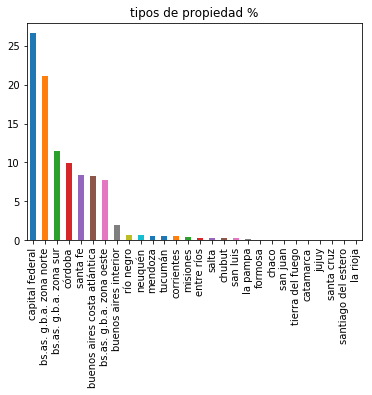

In [178]:
plot = (100 * df['state_name'].value_counts(normalize = True)).plot(
kind='bar', title='tipos de propiedad %')

## Conclusión 1
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

Las zonas con mayor cantidad de datos son CABA y BSAS Zona Norte,  se realiza analisis de apertura.

## CABA

In [179]:
caba = df[df.state_name == "capital federal"]

In [180]:
caba.groupby('place_name2')['q1', 'price_usd_per_m2', 'surface_total_in_m2' ].agg({'q1': ['sum'], 'price_usd_per_m2': ['mean', 'max', 'min'], 'surface_total_in_m2':['mean', 'max', 'min']})

price_usd_per_m2                                q1  \
                                 mean            max          min   sum   
place_name2                                                               
                          1772.903875   18571.428571   140.000000  1297   
abasto                    2057.529147    2939.393939   864.406780   113   
agronomía                 2088.124134    2638.297872   860.323887    41   
almagro                   2749.102521   25190.322581    70.512821  1165   
balvanera                 1982.249390   13066.666667   467.796610   667   
barracas                  1969.946866   29562.500000   401.408451   425   
barrio norte              3098.248857   15833.333333   120.891333  1140   
belgrano                  3153.981976   20833.333333    31.369688  2992   
boca                      2068.168061   21956.700000   214.592275   223   
boedo                    10697.513056  206333.333333   789.473684   890   
caballito                 2467.686974   20000.000000   162.588056  2273   
catalinas                 1833.333333    1833.333333  1833.333333     4   
centro / microcentro      2555.625344   31250.000000    39.950000   223   
chacarita                 2191.734147    4257.142857   862.068966   227   
coghlan                   2531.454280   12714.285714   128.191143   259   
colegiales                2514.793289    4634.146341   131.259574   352   
congreso                  2553.589315   25989.473684   126.188167   304   
constitución              1794.471533    3333.333333   516.000000   211   
flores                    2170.858377   40720.405797    69.381856  1354   
floresta                  1706.740147    3266.666667    69.239012   516   
las cañitas               3476.175811    6370.967742  1491.017964   143   
liniers                   1803.908335    4160.000000   696.594427   408   
mataderos                 1552.250025   16666.666667   500.000000   418   
monserrat                 2087.696576    5162.452381    49.000000   538   
monte castro              1846.987322    3555.555556   847.750865    79   
nuñez                     3246.570606   15735.000000   250.000000   778   
once                      2145.366555   22000.000000   486.058000   198   
palermo                   3420.416576   44900.000000   105.555556  4083   
parque avellaneda         1384.643386    2407.407407   211.111111    56   
parque centenario         2267.036488    3769.230769   868.852459    68   
parque chacabuco          1691.261767    3437.500000    91.081053   146   
parque chas               2024.507671    2443.750000  1366.666667    44   
parque patricios          1925.115323   19473.333333    24.207190   322   
paternal                  1912.503297    3958.333333   606.060606   173   
pompeya                   1084.339734    2227.272727   458.333333    64   
puerto madero             6029.687303   10869.565217   875.000000   647   
recoleta                  3392.858919   33000.000000   187.498377  1547   
retiro                    3003.908963    6646.525680   568.862275   248   
saavedra                  2538.664427   35591.836735   864.197531   542   
san cristobal             9952.388570   26241.636364   662.790698   614   
san nicolás               2342.872749   16250.000000   301.984469   187   
san telmo                 2314.992619    7619.047619   208.713217  1216   
tribunales                2149.124999    5162.452381  1000.000000    98   
velez sarsfield           1597.575326    3555.555556   777.070064    39   
versalles                 1542.378777    2500.000000   720.000000    55   
villa crespo              2522.508111   13181.818182    88.569290  1331   
villa del parque          2233.837905    8300.000000    90.964959   488   
villa devoto              2187.253763   17021.276596   805.970149   420   
villa general mitre       1800.696048    2586.206897   518.518519    48   
villa lugano              1186.138289    3478.260870   367.647059   205   
villa luro                2291.947875   32967.

In [181]:
caba.groupby('property_type' )['q1', 'price_usd_per_m2', 'surface_total_in_m2' ].agg({'q1': ['sum'], 'price_usd_per_m2': ['mean', 'max', 'min'], 'surface_total_in_m2':['mean', 'max', 'min']})

price_usd_per_m2                                q1  \
                          mean            max         min    sum   
property_type                                                      
apartment          3324.464870  206333.333333   31.369688  27037   
house              1546.701574   23064.516129  190.000000   2087   
ph                 1695.517729   25000.000000  120.964706   1828   
store              2899.667204   22000.000000   13.797467   1364   

              surface_total_in_m2                           
                             mean            max       min  
property_type                                               
apartment               96.923555  205700.000000  0.000000  
house                  423.304015   11022.840998  1.348360  
ph                     120.514763    1183.000000  1.228321  
store                  278.082562   10958.000000  0.000000

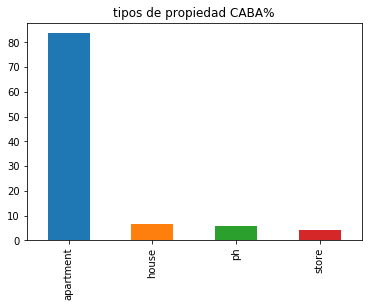

In [182]:
plot = (100 * caba['property_type'].value_counts(normalize = True)).plot(
kind='bar', title='tipos de propiedad CABA%')

In [183]:
caba.groupby(['state_name', 'property_type'])['price_usd_per_m2'].describe()

count         mean          std         min  \
state_name      property_type                                                  
capital federal apartment      19896.0  3324.464870  3892.824716   31.369688   
                house           1357.0  1546.701574  1654.290655  190.000000   
                ph              1266.0  1695.517729   887.360632  120.964706   
                store            915.0  2899.667204  2222.673859   13.797467   

                                       25%          50%          75%  \
state_name      property_type                                          
capital federal apartment      2111.111111  2566.046646  3168.758621   
                house           821.678322  1272.727273  1800.000000   
                ph             1222.222222  1625.000000  2058.823529   
                store          1523.623512  2372.881356  3605.555556   

                                         max  
state_name      property_type                 
capital federal apartment      206333.333333  
                house           23064.516129  
                ph              25000.000000  
                store           22000.000000

In [184]:
caba.groupby(['state_name', 'place_name2'])['price_usd_per_m2'].describe()

count          mean           std  \
state_name      place_name2                                                
capital federal                        831.0   1772.903875   1453.426533   
                abasto                  85.0   2057.529147    551.400794   
                agronomía               25.0   2088.124134    465.567568   
                almagro                830.0   2749.102521   3262.402046   
                balvanera              473.0   1982.249390    916.104947   
                barracas               355.0   1969.946866   1608.987186   
                barrio norte           890.0   3098.248857   1177.912480   
                belgrano              2127.0   3153.981976   1112.706621   
                boca                   178.0   2068.168061   3046.694643   
                boedo                  800.0  10697.513056  13188.768866   
                caballito             1678.0   2467.686974    983.916486   
                catalinas                1.0   1833.333333           NaN   
                centro / microcentro   193.0   2555.625344   2393.096415   
                chacarita              178.0   2191.734147    489.728755   
                coghlan                197.0   2531.454280    931.460283   
                colegiales             258.0   2514.793289    657.564927   
                congreso               232.0   2553.589315   3755.718513   
                constitución           161.0   1794.471533    508.069478   
                flores                1015.0   2170.858377   2181.519012   
                floresta               291.0   1706.740147    510.182195   
                las cañitas            128.0   3476.175811    900.754898   
                liniers                248.0   1803.908335    524.339446   
                mataderos              287.0   1552.250025   1117.326745   
                monserrat              330.0   2087.696576    671.702069   
                monte castro            46.0   1846.987322    577.965373   
                nuñez                  553.0   3246.570606   1574.786300   
                once                   120.0   2145.366555   2091.526594   
                palermo               2948.0   3420.416576   1763.437519   
                parque avellaneda       31.0   1384.643386    521.093177   
                parque centenario       61.0   2267.036488    489.691901   
                parque chacabuco        89.0   1691.261767    670.462599   
                parque chas             15.0   2024.507671    286.972932   
                parque patricios       233.0   1925.115323   1499.651149   
                paternal               105.0   1912.503297    507.132470   
                pompeya                 31.0   1084.339734    474.990453   
                puerto madero          490.0   6029.687303   1417.954497   
                recoleta              1188.0   3392.858919   1476.837829   
                retiro                 173.0   3003.908963   1116.310764   
                saavedra               411.0   2538.664427   2325.052833   
                san cristobal          454.0   9952.388570   9768.989436   
                san nicolás            123.0   2342.872749   1494.050588   
                san telmo             1000.0   2314.992619    655.268993   
                tribunales              73.0   2149.124999    792.552706   
                velez sarsfield         26.0   1597.575326    710.560346   
                versalles               26.0   1542.378777    375.115913   
                villa crespo          1028.0   2522.508111    769.399081   
                villa del parque       345.0   2233.837905    659.778064   
                villa devoto           262.0   2187.253763   1078.590017   
                villa general mitre     39.0   1800.696048    460.093155   
                villa lugano           128.0   1186.138289    503.811940   
                villa luro             299.0   2291.947875   2616.939152   
           

## Buenos Aires Zona NORTE
[Volver al Indice](#Indice)
<div class="footer">&copy; 2018 G5</div>

In [185]:
BSASNORTE = df[df.state_name == "bs.as. g.b.a. zona norte"]

In [186]:
BSASNORTE.groupby('place_name2')['q1', 'price_usd_per_m2', 'surface_total_in_m2' ].agg({'q1': ['sum'], 'price_usd_per_m2': ['mean', 'max', 'min'], 'surface_total_in_m2':['mean', 'max', 'min']})

price_usd_per_m2                              q1  \
                                mean           max         min   sum   
place_name2                                                            
                         1310.303764  11333.333333   16.958095   222   
escobar                  1110.781351  16428.571429   18.599562  1909   
general san martín       2064.219071  48296.222222  121.396055  1582   
josé c paz                841.071808  26315.789474   79.083333   140   
malvinas argentinas      1028.003798   2750.809061   23.863436   489   
pilar                    1456.960334  38000.000000   16.666667  3249   
san fernando             1929.277550  13875.000000   11.111111  1047   
san isidro               2064.457686  10312.500000    8.892740  3009   
san miguel               1253.306731  20833.333333   11.069145  1267   
tigre                    1949.676314  30952.380952    4.166667  8983   
vicente lópez            2477.561409   9036.144578   29.906933  3663   

                    surface_total_in_m2                      
                                   mean      max        min  
place_name2                                                  
                             806.470770  27000.0  28.000000  
escobar                      381.549172  45000.0   1.195865  
general san martín           170.719186   6500.0   0.000000  
josé c paz                   249.772396   1200.0   0.000000  
malvinas argentinas          549.214805  35000.0   0.000000  
pilar                        366.482608  24000.0   0.000000  
san fernando                 183.660896   9000.0   1.137931  
san isidro                   301.863819  43856.0   1.000000  
san miguel                   250.318234  17000.0   0.000000  
tigre                        301.390791  39831.0   1.137931  
vicente lópez                178.016481  22355.0   0.000000

In [187]:
BSASNORTE.groupby('property_type')['q1', 'price_usd_per_m2', 'surface_total_in_m2' ].agg({'q1': ['sum'], 'price_usd_per_m2': ['mean', 'max', 'min'], 'surface_total_in_m2':['mean', 'max', 'min']})

price_usd_per_m2                               q1  \
                          mean           max         min    sum   
property_type                                                     
apartment          2539.871735  48296.222222   29.906933  10622   
house              1339.764409  38000.000000    4.166667  13364   
ph                 1451.712566  11333.333333   49.485588    985   
store              1862.009755  20833.333333  158.730159    589   

              surface_total_in_m2                     
                             mean           max  min  
property_type                                         
apartment               90.884921  11544.310345  0.0  
house                  444.893397  45000.000000  0.0  
ph                     107.040669    900.000000  0.0  
store                  698.672694  35000.000000  0.0

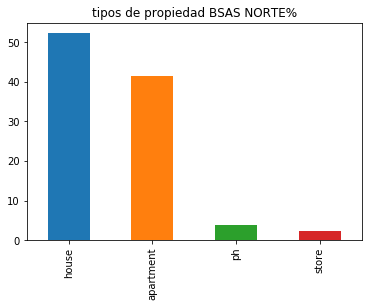

In [188]:
plot = (100 * BSASNORTE['property_type'].value_counts(normalize = True)).plot(
kind='bar', title='tipos de propiedad BSAS NORTE%')

In [189]:
 BSASNORTE.groupby(['state_name', 'property_type'])['price_usd_per_m2'].describe()

count         mean          std  \
state_name               property_type                                     
bs.as. g.b.a. zona norte apartment      7343.0  2539.871735  2387.647600   
                         house          9081.0  1339.764409  1192.540046   
                         ph              625.0  1451.712566   938.917931   
                         store           356.0  1862.009755  1819.141377   

                                               min          25%          50%  \
state_name               property_type                                         
bs.as. g.b.a. zona norte apartment       29.906933  1803.702899  2300.000000   
                         house            4.166667   750.000000  1283.018868   
                         ph              49.485588   923.076923  1325.581395   
                         store          158.730159   887.120349  1424.525316   

                                                75%           max  
state_name               property_type                             
bs.as. g.b.a. zona norte apartment      2922.077922  48296.222222  
                         house          1688.311688  38000.000000  
                         ph             1833.333333  11333.333333  
                         store          2201.470588  20833.333333

In [190]:
BSASNORTE.groupby(['state_name', 'place_name2'])['price_usd_per_m2'].describe()

count         mean  \
state_name               place_name2                                
bs.as. g.b.a. zona norte                       166.0  1310.303764   
                         escobar              1152.0  1110.781351   
                         general san martín    996.0  2064.219071   
                         josé c paz             84.0   841.071808   
                         malvinas argentinas   306.0  1028.003798   
                         pilar                2306.0  1456.960334   
                         san fernando          707.0  1929.277550   
                         san isidro           2049.0  2064.457686   
                         san miguel            810.0  1253.306731   
                         tigre                6431.0  1949.676314   
                         vicente lópez        2398.0  2477.561409   

                                                      std         min  \
state_name               place_name2                                    
bs.as. g.b.a. zona norte                      1269.355574   16.958095   
                         escobar               824.418817   18.599562   
                         general san martín   5995.075588  121.396055   
                         josé c paz           2864.358611   79.083333   
                         malvinas argentinas   635.559333   23.863436   
                         pilar                1193.006776   16.666667   
                         san fernando         1101.982718   11.111111   
                         san isidro            998.469235    8.892740   
                         san miguel           1311.431973   11.069145   
                         tigre                1337.738290    4.166667   
                         vicente lópez        1117.422087   29.906933   

                                                      25%          50%  \
state_name               place_name2                                     
bs.as. g.b.a. zona norte                       841.154971  1120.192308   
                         escobar               624.639145  1143.133998   
                         general san martín    707.469588  1125.718391   
                         josé c paz            236.228356   367.500000   
                         malvinas argentinas   406.539352  1074.480228   
                         pilar                1041.666667  1362.669246   
                         san fernando         1268.333333  1877.187294   
                         san isidro           1274.961598  1952.191235   
                         san miguel            594.222969  1250.000000   
                         tigre                1395.591085  1885.714286   
                         vicente lópez        1635.052448  2386.363636   

                                                      75%           max  
state_name               place_name2                                     
bs.as. g.b.a. zona norte                      1516.861253  11333.333333  
                         escobar              1423.452944  16428.571429  
                         general san martín   1666.666667  48296.222222  
                         josé c paz            672.794118  26315.789474  
                         malvinas argentinas  1505.988661   2750.809061  
                         pilar                1737.528062  38000.000000  
                         san fernando         2333.333333  13875.000000  
                         san isidro           2788.461538  10312.500000  
                         san miguel           1625.000000  20833.333333  
                         tigre                2407.407407  30952.380952  
                         vicente lópez        3117.264257   9036.144578

## Generacion de graficos en html - Bokeh

*grafico Tipos de propiedades | Count

In [191]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import *
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

In [192]:
output_file("bar_tipo_propiedad.html")

In [193]:
tipos = df["property_type"].unique()

In [194]:
counts = np.array(tipo2)

In [195]:
source = ColumnDataSource(data=dict(tipos=tipos, counts=counts))

In [196]:
p = figure(x_range=tipos, plot_height=350, toolbar_location=None, title="Tipos de propiedades | Count")
p.vbar(x='tipos', top='counts', width=0.9, source=source, legend="tipos",
       line_color='white', fill_color=factor_cmap('tipos', palette=Spectral6, factors=tipos))

bokeh.models.renderers.GlyphRenderer(
    id='620adeeb-6aec-4c81-94b9-b991a4747548',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='09da8d2e-221d-4947-945f-34aa4b6026e0',
        callback=None,
        data={'counts': [71065, 40267, 5751, 4136],
         'tipos': ['ph', 'apartment', 'house', 'store']},
        js_event_callbacks={},
        js_property_callbacks={},
        name=None,
        selected=bokeh.models.selections.Selection(
            id='b59af9c5-e201-474a-bf0e-8a076615af40',
            indices=[],
            js_event_callbacks={},
            js_property_callbacks={},
            line_indices=[],
            multiline_indices={},
            name=None,
            subscribed_events=[],
            tags=[]),
        selection_policy=bokeh.models.selections.UnionRenderers(
            id='c23d7353-fd75-454f-92b4-c98574196ab2',
            js_event_callbacks={},
            js_property_callbacks={},
            name=None,
            subscribed_events=[],
            tags=[]),
        subscribed_events=[],
        tags=[]),
    glyph=bokeh.models.glyphs.VBar(
        id='9d1256f2-5c01-4b1d-b77d-5269ee54f254',
        bottom={'value': 0},
        fill_alpha={'value': 1.0},
        fill_color={'field': 'tipos',
         'transform': bokeh.models.mappers.CategoricalColorMapper(
             id='c885fbb3-075a-4db9-9654-c83c8729e63b',
             end=None,
             factors=array(['ph', 'apartment', 'house', 'store'], dtype=object),
             js_event_callbacks={},
             js_property_callbacks={},
             name=None,
             nan_color='gray',
             palette=['#3288bd',
              '#99d594',
              '#e6f598',
              '#fee08b',
              '#fc8d59',
              '#d53e4f'],
             start=0,
             subscribed_events=[],
             tags=[])},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 1.0},
        line_cap='butt',
        line_color={'value': 'white'},
        line_dash=[],
        line_dash_offset=0,
        line_join='bevel',
        line_width={'value': 1},
        name=None,
        subscribed_events=[],
        tags=[],
        top={'field': 'counts'},
        width={'value': 0.9},
        x={'field': 'tipos'}),
    hover_glyph=None,
    js_event_callbacks={},
    js_property_callbacks={},
    level='glyph',
    muted=False,
    muted_glyph=None,
    name=None,
    nonselection_glyph=bokeh.models.glyphs.VBar(
        id='ba325937-7715-43eb-968a-1959ee0a9997',
        bottom={'value': 0},
        fill_alpha={'value': 0.1},
        fill_color={'value': '#1f77b4'},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 0.1},
        line_cap='butt',
        line_color={'value': '#1f77b4'},
        line_dash=[],
        line_dash_offset=0,
        line_join='bevel',
        line_width={'value': 1},
        name=None,
        subscribed_events=[],
        tags=[],
        top={'field': 'counts'},
        width={'value': 0.9},
        x={'field': 'tipos'}),
    selection_glyph=None,
    subscribed_events=[],
    tags=[],
    view=bokeh.models.sources.CDSView(
        id='1b5bc180-ec74-44d6-8876-e0428b5f8296',
        filters=[],
        js_event_callbacks={},
        js_property_callbacks={},
        name=None,
        source=bokeh.models.sources.ColumnDataSource(
            id='09da8d2e-221d-4947-945f-34aa4b6026e0',
            callback=None,
            data={'counts': [71065, 40267, 5751, 4136],
             'tipos': ['ph', 'apartment', 'house', 'store']},
            js_event_callbacks={},
            js_property_callbacks={},
            name=None,
            selected=bokeh.models.selections.Selection(
                id='b59af9c5-e201-474a-bf0e-8a076615af40',
                indices=[],
                js_event_callbacks={},
                js_property_callbacks={},
                line_indices=[],
                multiline_indices={},
         

In [197]:
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 80000
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

In [198]:
show(p)

*Grafico Provincias | Count

In [199]:
output_file("bar_state_name.html")

In [200]:
prov = df["state_name"].unique()

In [201]:
counts1 = np.array(state2)

In [202]:
source = ColumnDataSource(data=dict(prov=prov, counts1=counts1))

In [203]:
p1 = figure(x_range=prov, plot_height=350, toolbar_location=None, title="Provincias | Count")
p1.vbar(x='prov', top='counts1', width=0.9, source=source, legend=None,
       line_color='white', fill_color=factor_cmap('prov', palette=Spectral11, factors=prov))

C:\Pgms\Anaconda3\lib\site-packages\bokeh\models\mappers.py:82: UserWarning: Palette length does not match number of factors. ['neuquén' 'río negro' 'san luis' 'mendoza' 'corrientes' 'chubut'
 'tucumán' 'la pampa' 'chaco' 'san juan' 'santa cruz' 'tierra del fuego'
 'catamarca' 'santiago del estero' 'jujuy' 'la rioja' 'formosa'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


bokeh.models.renderers.GlyphRenderer(
    id='26e23cfb-1da3-4aa4-aa86-e22a0496c1dc',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='dba65efb-6c37-4b16-abe8-728eaa04102d',
        callback=None,
        data={'counts1': [32316,
          25560,
          13952,
          12068,
          10172,
          10006,
          9322,
          2291,
          808,
          733,
          681,
          674,
          583,
          464,
          369,
          278,
          259,
          252,
          157,
          65,
          57,
          40,
          31,
          27,
          26,
          20,
          4,
          4],
         'prov': ['capital federal',
          'bs.as. g.b.a. zona sur',
          'buenos aires costa atlántica',
          'entre ríos',
          'bs.as. g.b.a. zona norte',
          'santa fe',
          'córdoba',
          'bs.as. g.b.a. zona oeste',
          'misiones',
          'buenos aires interior',
          'salta',
          'neuquén',
          'río negro',
          'san luis',
          'mendoza',
          'corrientes',
          'chubut',
          'tucumán',
          'la pampa',
          'chaco',
          'san juan',
          'santa cruz',
          'tierra del fuego',
          'catamarca',
          'santiago del estero',
          'jujuy',
          'la rioja',
          'formosa']},
        js_event_callbacks={},
        js_property_callbacks={},
        name=None,
        selected=bokeh.models.selections.Selection(
            id='6f8e1d1b-4917-4c7f-b47c-06f31cf417e3',
            indices=[],
            js_event_callbacks={},
            js_property_callbacks={},
            line_indices=[],
            multiline_indices={},
            name=None,
            subscribed_events=[],
            tags=[]),
        selection_policy=bokeh.models.selections.UnionRenderers(
            id='af58897e-b85f-4fa5-b59d-4bf7c77e6d8f',
            js_event_callbacks={},
            js_property_callbacks={},
            name=None,
            subscribed_events=[],
            tags=[]),
        subscribed_events=[],
        tags=[]),
    glyph=bokeh.models.glyphs.VBar(
        id='df374ad9-fcee-4d8d-9220-0f536415c6b5',
        bottom={'value': 0},
        fill_alpha={'value': 1.0},
        fill_color={'field': 'prov',
         'transform': bokeh.models.mappers.CategoricalColorMapper(
             id='5e0bffea-79ac-4614-96c4-f946878cfd62',
             end=None,
             factors=array(['capital federal', 'bs.as. g.b.a. zona sur',
                    'buenos aires costa atlántica', 'entre ríos',
                    'bs.as. g.b.a. zona norte', 'santa fe', 'córdoba',
                    'bs.as. g.b.a. zona oeste', 'misiones', 'buenos aires interior',
                    'salta', 'neuquén', 'río negro', 'san luis', 'mendoza',
                    'corrientes', 'chubut', 'tucumán', 'la pampa', 'chaco', 'san juan',
                    'santa cruz', 'tierra del fuego', 'catamarca',
                    'santiago del estero', 'jujuy', 'la rioja', 'formosa'],
                   dtype=object),
             js_event_callbacks={},
             js_property_callbacks={},
             name=None,
             nan_color='gray',
             palette=['#5e4fa2',
              '#3288bd',
              '#66c2a5',
              '#abdda4',
              '#e6f598',
              '#ffffbf',
              '#fee08b',
              '#fdae61',
              '#f46d43',
              '#d53e4f',
              '#9e0142'],
             start=0,
             subscribed_events=[],
             tags=[])},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 1.0},
        line_cap='butt',
        line_color={'value': 'white'},
        line_dash=[],
        line_dash_offset=0,
        line_join='bevel',
        line_width={'value': 1},
        name=None,
        subscribed_events=[],
        tags=[],
        top={'field': 'counts1'},
        width={'value': 0.9},
    

In [204]:
p1.xgrid.grid_line_color = None
p1.y_range.start = 0
p1.y_range.end = 35000
p1.legend.orientation = "vertical"
p1.legend.location = "top_right"
p1.xaxis.major_label_orientation = 1

In [205]:
show(p1)